In [52]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic("matplotlib","inline")
import numpy as np
image=plt.imread("lena.jpg")
print(image)
print(np.size(image))


[[[227 134 117]
  [227 134 117]
  [227 134 117]
  ...
  [229 142 125]
  [207 122 102]
  [192 107  87]]

 [[227 134 117]
  [227 134 117]
  [227 134 117]
  ...
  [233 147 130]
  [213 127 110]
  [199 113  96]]

 [[227 134 117]
  [227 134 117]
  [227 134 117]
  ...
  [237 151 138]
  [218 132 119]
  [203 120 106]]

 ...

 [[ 91  31  59]
  [ 91  31  59]
  [ 91  31  59]
  ...
  [162  80  69]
  [165  83  71]
  [168  84  73]]

 [[ 91  31  59]
  [ 91  31  59]
  [ 91  31  59]
  ...
  [165  83  71]
  [169  87  73]
  [172  89  73]]

 [[ 91  31  59]
  [ 91  31  59]
  [ 91  31  59]
  ...
  [167  85  73]
  [171  90  73]
  [174  91  75]]]
786432


In [53]:
image.shape


(512, 512, 3)

786432

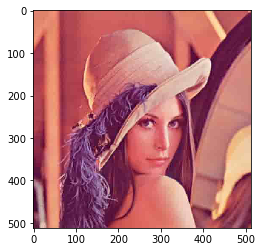

In [54]:
plt.imshow(image)
np.size(image)


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/srv/conda/envs/notebook/lib/p

AxesImage(54,36;334.8x217.44)


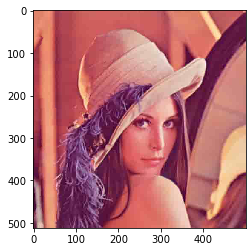

In [56]:
def MinimumEnergy(energylst):
    a=np.array(energylst.copy())
    for row in range(len(a)):
        if row==0:
            pass
        else:
            for element in range(len(a[row])):
                if element==0:
                    a[row][element]=[(a[row][element][0])+(min(int(energylst[row-1][element][0]),int(energylst[row-1][element+1][0])))]
                elif element==len(a[row])-1:
                    a[row][element]=[(a[row][element][0]+min(int(energylst[row-1][element-1][0]),int(energylst[row-1][element][0])))]
        
                else:
                    a[row][element]=[(a[row][element][0]+min(int(energylst[row-1][element-1][0]),int(energylst[row-1][element][0]),int(energylst[row-1][element+1][0])))]
    return a
def RemoveSeam(energylst):
    lst=MinimumEnergy(energylst)
    nlst=[]
    temp=np.array(lst.copy())
    for row in range(len(temp)-1,0,-1):
        if row==len(temp)-1:
            for column in range(len(temp[row])):
                element=temp[row][column]    
                for j in range(len(temp[row])):
                    if int(temp[row][j][0])<int(element[0]): 
                        element=temp[row][j]
                        index=j
            nlst.append(([element[0]],row,index))
        else:
            for column in range(len(temp[row])-1):
                element=nlst[-1][0]
                rw=nlst[-1][1]
                col=nlst[-1][2]
                if rw==0:
                    break
                else:
                    if col==0:
                        ans=[(min(int(temp[rw-1][col][0]),int(temp[rw-1][col+1][0])))]
                        coll=np.where(temp[rw-1]==ans)
                        nlst.append((ans,rw-1,coll[0][0]))
                    elif col==len(temp[row])-1:
                        ans=[(min(int(temp[rw-1][col-1][0]),int(temp[rw-1][col][0])))]
                        coll=np.where(temp[rw-1]==ans)
                        nlst.append((ans,rw-1,coll[0][0]))
                    else:
                        ans=[(min(int(temp[rw-1][col-1][0]),int(temp[rw-1][col][0]),int(temp[rw-1][col+1][0])))]
                        coll=np.where(temp[rw-1]==ans)
                        nlst.append((ans,rw-1,coll[0][0]))
    
    return(nlst)


def SeamCarving(size,energylst,image):
    if image.shape==size:
        print(plt.imshow(image))
        return
    else:
        lst=[]
        w=[]
        final=[]
        final=RemoveSeam(energylst)
        final=final[::-1]
        for i in final:
            b=np.delete(energylst[i[1]],i[2],0)
            a=(np.delete(image[i[1]],i[2],0))
            lst.append(a)
            w.append(b)
        SeamCarving(size,np.asarray(w),np.asarray(lst))
        
        
SeamCarving((512,500,3),energy(image),image)




In [55]:
def energy(img):
    energylst = np.empty([image.shape[0],image.shape[1],1])
    row=0
    col=0
    while row < len(img):
        col = 0
#         print(len(img[row]))
        while col < len(img[row]):
#             print(row,col)
            if (row==0 and col==0): #top left corner
                Rx= img[row][len(img[row])-1][0] - img[row][col+1][0]
                Gx= img[row][len(img[row])-1][1] - img[row][col+1][1]
                Bx= img[row][len(img[row])-1][2] - img[row][col+1][2]
                Ry= img[len(img)-1][col][0] - img[row+1][col][0]
                Gy= img[len(img)-1][col][1] - img[row+1][col][1]
                By= img[len(img)-1][col][2] - img[row+1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            elif (row==0 and col==len(img[row])-1): #top right corner
                Rx= img[row][0][0] - img[row][col-1][0]
                Gx= img[row][0][1] - img[row][col-1][1]
                Bx= img[row][0][2] - img[row][col-1][2]
                Ry= img[len(img)-1][col][0] - img[row+1][col][0]
                Gy= img[len(img)-1][col][1] - img[row+1][col][1]
                By= img[len(img)-1][col][2] - img[row+1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value         
            elif (row==len(img)-1 and col==0): #bottom left corner
                Rx= img[row][len(img[row])-1][0] - img[row][col+1][0]
                Gx= img[row][len(img[row])-1][1] - img[row][col+1][1]
                Bx= img[row][len(img[row])-1][2] - img[row][col+1][2]
                Ry= img[0][0][0] - img[row-1][col][0]
                Gy= img[0][0][1] - img[row-1][col][1]
                By= img[0][0][2] - img[row-1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            elif (row==len(img)-1 and col==len(img[row])-1): #bottom right corner
                Rx= img[row][0][0] - img[row][col-1][0]
                Gx= img[row][0][1] - img[row][col-1][1]
                Bx= img[row][0][2] - img[row][col-1][2]
                Ry= img[0][col][0] - img[row-1][col][0]
                Gy= img[0][col][1] - img[row-1][col][1]
                By= img[0][col][2] - img[row-1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            elif row==0 and (col<len(img[row])-1 and col>0):  #top middle
                Rx= img[row][col+1][0] - img[row][col-1][0]
                Gx= img[row][col+1][1] - img[row][col-1][1]
                Bx= img[row][col+1][2] - img[row][col-1][2]
                Ry= img[len(img)-1][col][0] - img[row+1][col][0]
                Gy= img[len(img)-1][col][1] - img[row+1][col][1]
                By= img[len(img)-1][col][2] - img[row+1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            elif col==0 and (row<len(img)-1 and row>0): #leftmost
                Rx= img[row][0][0] - img[row][col-1][0]
                Gx= img[row][0][1] - img[row][col-1][1]
                Bx= img[row][0][2] - img[row][col-1][2]
                Ry= img[row+1][col][0] - img[row-1][col][0]
                Gy= img[row+1][col][1] - img[row-1][col][1]
                By= img[row+1][col][2] - img[row-1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            elif col==len(img[row])-1 and (row<len(img)-1 and row>0): #rightmost
                Rx= img[row][len(img[row])-1][0] - img[row][col-1][0]
                Gx= img[row][len(img[row])-1][1] - img[row][col-1][1]
                Bx= img[row][len(img[row])-1][2] - img[row][col-1][2]
                Ry= img[row+1][col][0] - img[row-1][col][0]
                Gy= img[row+1][col][1] - img[row-1][col][1]
                By= img[row+1][col][2] - img[row-1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            elif row==len(img)-1 and (col<len(img[row])-1 and col>0): #botton middle
                Rx= img[row][col+1][0] - img[row][col-1][0]
                Gx= img[row][col+1][1] - img[row][col-1][1]
                Bx= img[row][col+1][2] - img[row][col-1][2]
                Ry= img[0][col][0] - img[row-1][col][0]
                Gy= img[0][col][1] - img[row-1][col][1]
                By= img[0][col][2] - img[row-1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            else: #all middle values
                Rx= img[row][col+1][0] - img[row][col-1][0]
                Gx= img[row][col+1][1] - img[row][col-1][1]
                Bx= img[row][col+1][2] - img[row][col-1][2] 
                Ry= img[row+1][col][0] - img[row-1][col][0]
                Gy= img[row+1][col][1] - img[row-1][col][1]
                By= img[row+1][col][2] - img[row-1][col][2]
                x= (Rx**2 + Gx**2 + Bx**2)
                y= (Ry**2 + Gy**2 + By**2)
                value= x+y
                energylst[row][col]= value
            col = col+1
        row = row + 1
    return energylst
energy(image)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/srv/conda/envs/notebook/lib/p

array([[[2.29371e+05],
        [7.70130e+04],
        [7.70130e+04],
        ...,
        [2.58982e+05],
        [2.86044e+05],
        [1.64111e+05]],

       [[1.66600e+03],
        [0.00000e+00],
        [0.00000e+00],
        ...,
        [1.47284e+05],
        [1.48362e+05],
        [1.76343e+05]],

       [[8.93000e+02],
        [0.00000e+00],
        [0.00000e+00],
        ...,
        [2.77556e+05],
        [2.14650e+05],
        [1.76776e+05]],

       ...,

       [[1.31814e+05],
        [0.00000e+00],
        [0.00000e+00],
        ...,
        [3.27000e+02],
        [2.65000e+02],
        [2.11000e+02]],

       [[1.28393e+05],
        [0.00000e+00],
        [0.00000e+00],
        ...,
        [2.84000e+02],
        [1.78000e+02],
        [1.02000e+02]],

       [[4.32140e+04],
        [3.24690e+04],
        [3.24690e+04],
        ...,
        [1.07300e+04],
        [3.59900e+03],
        [1.29269e+05]]])

In [58]:
ft=np.array([])
print(ft)

[]
